# Import Data and Libraries

In [440]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from statistics import mean
import pandas as pd
import re
from matplotlib.pyplot import figure

In [441]:
df_sport = pd.read_csv('sport_preprocessed.csv')

In [442]:
df_sport.head()

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month,sport_ticks_this_month
0,2020-12-19,Aidan Shelburne,12,2020-12,Male,21.0,5.11b,TR,NaN,1.0,5.11a,5.11d,15.0,15.0,15.00,1
1,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d,14.0,14.0,11.75,4
2,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,5.11a,5.11d,10.0,14.0,11.75,4
3,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.75,4
4,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.75,4


# Changing Columns

Before beginning the analysis I need to change a couple of columns. The 'Follow' and 'Lead' columns are currently strings, and need to be converted to numerical values so that they can be compared.

In [443]:
def numerical_difficulty(row):
    """
    Integer to represent general climbing difficulty.
    """
    grade = str(row)
    if (re.search('5.15d', grade)):
        difficulty = 33
    elif (re.search('5.15c', grade)):
        difficulty = 32      
    elif (re.search('5.15b', grade)):
        difficulty = 31
    elif (re.search('5.15a', grade)):
        difficulty = 30
    elif (re.search('5.15\\+', grade)):
        difficulty = 32.5
    elif (re.search('5.15\\-', grade)):
        difficulty = 30.5
    elif (re.search('5.15', grade)):
        difficulty = 31.5 
          
    elif (re.search('5.14d', grade)):
        difficulty = 29
    elif (re.search('5.14c', grade)):
        difficulty = 28
    elif (re.search('5.14b', grade)):
        difficulty = 27
    elif (re.search('5.14a', grade)):
        difficulty = 26
    elif (re.search('5.14\\+', grade)):
        difficulty = 28.5  
    elif (re.search('5.14\\-', grade)):
        difficulty = 26.5 
    elif (re.search('5.14', grade)):
        difficulty = 27.5 
          
    elif (re.search('5.13d', grade)):
        difficulty = 25
    elif (re.search('5.13c', grade)):
        difficulty = 24
    elif (re.search('5.13b', grade)):
        difficulty = 23
    elif (re.search('5.13a', grade)):
        difficulty = 22
    elif (re.search('5.13\\+', grade)):
        difficulty = 24.5  
    elif (re.search('5.13\\-', grade)):
        difficulty = 22.5  
    elif (re.search('5.13', grade)):
        difficulty = 23.5
          
    elif (re.search('5.12d', grade)):
        difficulty = 21
    elif (re.search('5.12c', grade)):
        difficulty = 20
    elif (re.search('5.12b', grade)):
        difficulty = 19
    elif (re.search('5.12a', grade)):
        difficulty = 18
    elif (re.search('5.12\\+', grade)):
        difficulty = 20.5
    elif (re.search('5.12\\-', grade)):
        difficulty = 18.5
    elif (re.search('5.12', grade)):
        difficulty =  19.5
          
    elif (re.search('5.11d', grade)):
        difficulty = 17
    elif (re.search('5.11c', grade)):
        difficulty = 16
    elif (re.search('5.11b', grade)):
        difficulty = 15
    elif (re.search('5.11a', grade)):
        difficulty = 14
    elif (re.search('5.11\\+', grade)):
        difficulty = 16.5
    elif (re.search('5.11\\-', grade)):
        difficulty = 14.5
    elif (re.search('5.11', grade)):
        difficulty =  15.5

    elif (re.search('5.10d', grade)):
        difficulty = 13
    elif (re.search('5.10c', grade)):
        difficulty = 12
    elif (re.search('5.10b', grade)):
        difficulty = 11
    elif (re.search('5.10a', grade)):
        difficulty = 10
    elif (re.search('5.10\\-', grade)):
        difficulty = 10.5 
    elif (re.search('5.10\\+', grade)):
        difficulty = 12.5 
    elif (re.search('5.10', grade)):
        difficulty =  11.5

          
    elif (re.search('5.9', grade)):
        difficulty = 9 
    elif (re.search('5.8', grade)):
        difficulty = 8           
    elif (re.search('5.7', grade)):
        difficulty = 7           
    elif (re.search('5.6', grade)):
        difficulty = 6    
    elif (re.search('5.5', grade)):
        difficulty = 5           
    elif (re.search('5.4', grade)):
        difficulty = 4         
    elif (re.search('5.3', grade)):
        difficulty = 3           
    elif (re.search('5.2', grade)):
        difficulty = 2           
    elif (re.search('5.1', grade)):
        difficulty = 1           
    elif (re.search('5.0', grade)):
        difficulty = .8          
    elif (re.search('5th', grade)):
        difficulty = .6          
    elif (re.search('4th', grade)):
        difficulty = .4           
    elif (re.search('3rd', grade)):
        difficulty = .2 
    else: 
          difficulty = 0
    return difficulty


In [444]:
# Get the Sport Lead grades into a numerical format.
df_sport['numerical_lead'] = df_sport['Sport Leads'].apply(lambda row: numerical_difficulty(row))


In [445]:
# Get the Sport Follow grades into a numerical format.
df_sport['numerical_follow'] = df_sport['Sport Follows'].apply(lambda row: numerical_difficulty(row))


In [446]:
df_sport.sample(5)

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month,sport_ticks_this_month,numerical_lead,numerical_follow
156701,2015-08-10,Laura T,8,2015-08,Female,30.0,5.12a,NaN,NaN,1.0,5.11d,5.11d,18.0,18.0,13.500000,2,17.0,17.0
13063,2020-07-03,Bryan E,7,2020-07,Male,29.0,5.10d,Lead,NaN,1.0,5.12b,5.12d,13.0,19.0,16.571429,14,19.0,21.0
138456,2017-06-24,mojojojo Cee,6,2017-06,Female,44.0,5.9,TR,NaN,1.0,5.10b,5.11b,9.0,13.0,10.666667,3,11.0,15.0
82321,2019-05-31,Amir Erez,5,2019-05,Male,41.0,5.12b,NaN,NaN,1.0,5.0,5.0,19.0,20.0,19.000000,3,0.8,0.8
9897,2019-08-14,Ben Bauer,8,2019-08,Male,28.0,5.12a,NaN,NaN,1.0,5.13a,5.13a,18.0,22.0,16.400000,40,22.0,22.0


In [448]:
# Remove difficulties that are 'unknown', defined as 0 in my function.
df_sport = df_sport[df_sport['numerical_lead'] > 0]

In [449]:
# Sanity check
df_sport.numerical_lead.unique()

array([14. , 20. , 24. ,  9. , 11. , 18. ,  0.4, 16. ,  0.2, 10. , 13. ,
       21. , 22. , 19. , 12. , 17. , 15. , 23. ,  7. ,  8. ,  4. ,  6. ,
        0.8, 26. , 28. , 27. , 25. ,  2. , 29. ,  5. , 33. ,  1. ,  3. ])

# Outliers - Lead

Another pre-processing step specific to this analysis is that I need to remove outlier users that claim to lead a specific grade, but they've led that grade hundreds of times. These are instances where they might have forgotten to update their profile.

## Identification

In [27]:
# Get a list of the unique names
names = df_sport.Name.unique()

# Get the list of unique grades
the_leads = df_sport['Sport Leads'].unique()

# Make a dictionary with each grade and their average counts above the Climb Claim
lead_dict_full = {} # Values are for every user
lead_dict = {} # Values are averages 
for lead_grade in the_leads:
    count_above_lead = []
    for name in names:
        if len(df_sport[(df_sport.Name == name) & (df_sport['Sport Leads'] == lead_grade)]) == 0:
            x=0
        else:
            count_above_lead.append(len(df_sport[(df_sport.Name == name) & 
                                                       (df_sport['Sport Leads'] == lead_grade) &
                                                       (df_sport.numerical_difficulty >= df_sport.numerical_lead)]['numerical_difficulty']))
    lead_dict_full[lead_grade] = count_above_lead
    lead_dict[lead_grade] = mean(count_above_lead)

In [100]:
# Reorder the dictionary by climbing grade
desired_order_list = [' 3rd', ' 4th', ' 5.0', ' 5.1', ' 5.2', ' 5.3', ' 5.4', ' 5.5', ' 5.6', ' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b', ' 5.12c', 
             ' 5.12d',' 5.13a', ' 5.13b', ' 5.13c', ' 5.13d', ' 5.14a', ' 5.14b', ' 5.14c', ' 5.14d']

reordered_dict = {k: lead_dict_full[k] for k in desired_order_list}

In [103]:
# Turn the reordered dictionary into a dataframe (for plotting)
all_grades = pd.DataFrame(list(reordered_dict.values()), index=reordered_dict.keys())
all_grades = all_grades.T
all_grades

,3rd,4th,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,...,5.12c,5.12d,5.13a,5.13b,5.13c,5.13d,5.14a,5.14b,5.14c,5.14d
0,3.0,149.0,10.0,41.0,28.0,189.0,2.0,10.0,1.0,31.0,...,28.0,15.0,32.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
1,262.0,92.0,35.0,243.0,47.0,1.0,20.0,120.0,2.0,5.0,...,4.0,1.0,4.0,0.0,2.0,1.0,2.0,NaN,NaN,NaN
2,127.0,1116.0,175.0,NaN,254.0,NaN,78.0,15.0,3.0,1.0,...,15.0,2.0,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
3,23.0,9.0,4.0,NaN,NaN,NaN,83.0,10.0,2.0,1.0,...,0.0,2.0,14.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN
4,9.0,3.0,17.0,NaN,NaN,NaN,14.0,5.0,12.0,9.0,...,0.0,26.0,0.0,4.0,3.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# 'Melt' the dataframe, for plotting.
all_grades = pd.melt(all_grades, value_vars=all_grades.columns)
all_grades = all_grades.dropna()
all_grades

,variable,value
0,3rd,3.0
1,3rd,262.0
2,3rd,127.0
3,3rd,23.0
4,3rd,9.0
...,...,...
11119,5.14a,2.0
11120,5.14a,0.0
11513,5.14b,0.0
11910,5.14c,0.0


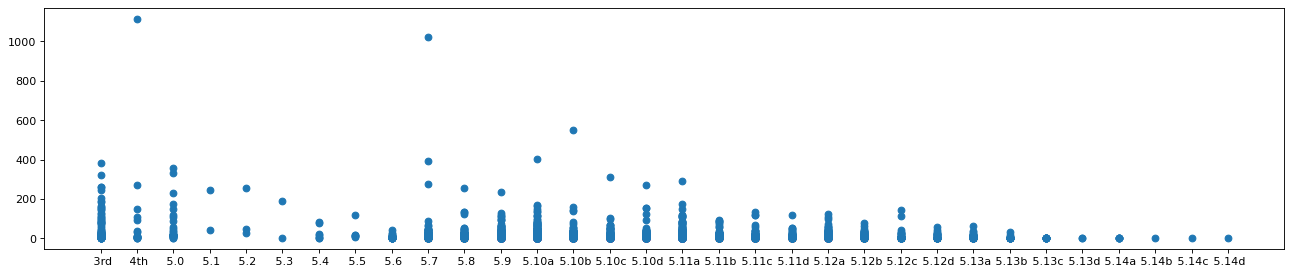

In [105]:
# Plot the counts for each user with the grade they claim to climb.
plt.figure(figsize=(20, 4), dpi=80)
plt.scatter(x=all_grades['variable'], y=all_grades['value'])

There are a couple outliers in the 4th class and 5.7 category. I'll set the cutoff at 100.

## Removal

In [450]:
# Add in a column that shows the count of climbs they've done above their claim grade for each user
df_sport_lead = df_sport[df_sport['Style'] == 'Lead']
names = df_sport_lead.Name.unique()

df = pd.DataFrame()
for name in names:
    user_df = df_sport_lead[df_sport_lead['Name'] == name]
    count_above_claim = len(user_df[user_df['numerical_lead'] <= user_df['numerical_difficulty']])
    user_df['above_claim'] = count_above_claim
    df = df.append(user_df)
    
df

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month,sport_ticks_this_month,numerical_lead,numerical_follow,above_claim
1,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d,14.0,14.0,11.750000,4,14.0,17.0,3
2,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,5.11a,5.11d,10.0,14.0,11.750000,4,14.0,17.0,3
3,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.750000,4,14.0,17.0,3
4,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.750000,4,14.0,17.0,3
5,2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.10b,Lead,Onsight,1.0,5.11a,5.11d,11.0,11.0,9.750000,4,14.0,17.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224142,2017-09-22,Tracey Pomeroy,9,2017-09,Female,65.0,5.8,Lead,Onsight,1.0,5.10a,5.10c,8.0,11.0,8.000000,6,10.0,12.0,17
224143,2017-09-09,Tracey Pomeroy,9,2017-09,Female,65.0,5.6,Lead,Onsight,3.0,5.10a,5.10c,6.0,11.0,8.000000,6,10.0,12.0,17
224146,2017-08-26,Tracey Pomeroy,8,2017-08,Female,65.0,5.10a,Lead,Redpoint,1.0,5.10a,5.10c,10.0,10.0,9.666667,3,10.0,12.0,17
224147,2017-08-26,Tracey Pomeroy,8,2017-08,Female,65.0,5.9,Lead,Redpoint,1.0,5.10a,5.10c,9.0,10.0,9.666667,3,10.0,12.0,17


In [451]:
df

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month,sport_ticks_this_month,numerical_lead,numerical_follow,above_claim
1,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,5.11a,5.11d,14.0,14.0,11.750000,4,14.0,17.0,3
2,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,5.11a,5.11d,10.0,14.0,11.750000,4,14.0,17.0,3
3,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.750000,4,14.0,17.0,3
4,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,5.11a,5.11d,11.5,14.0,11.750000,4,14.0,17.0,3
5,2020-07-16,Aidan Shelburne,7,2020-07,Male,21.0,5.10b,Lead,Onsight,1.0,5.11a,5.11d,11.0,11.0,9.750000,4,14.0,17.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224142,2017-09-22,Tracey Pomeroy,9,2017-09,Female,65.0,5.8,Lead,Onsight,1.0,5.10a,5.10c,8.0,11.0,8.000000,6,10.0,12.0,17
224143,2017-09-09,Tracey Pomeroy,9,2017-09,Female,65.0,5.6,Lead,Onsight,3.0,5.10a,5.10c,6.0,11.0,8.000000,6,10.0,12.0,17
224146,2017-08-26,Tracey Pomeroy,8,2017-08,Female,65.0,5.10a,Lead,Redpoint,1.0,5.10a,5.10c,10.0,10.0,9.666667,3,10.0,12.0,17
224147,2017-08-26,Tracey Pomeroy,8,2017-08,Female,65.0,5.9,Lead,Redpoint,1.0,5.10a,5.10c,9.0,10.0,9.666667,3,10.0,12.0,17


In [452]:
# Look at the users that are about to be removed.
df[df['above_claim'] > 100].Name.unique()

array(['Paris Buedel', 'Mason Caiby', 'Spencer B', 'Liet Keynes',
       'Brian Stevens', 'Nick Spitznagle', 'Angie M', 'Zack Hines', 'tim',
       'Sarah Meiser', 'Dave Holliday', 'Jonny Pizzaronni',
       'Steve Bachmeier', 'Brian in SLC', 'Connor Mason', 'Alan Benson',
       'Tyler F', 'Michael Stemkovski', 'Laura T', 'Ken Noyce',
       'Boissal .', 'Daniel Kryger', 'Ryan O', 'Sean M', 'Andrew Walker',
       'Alex Maiorella', 'kimnguyen06'], dtype=object)

In [453]:
# Remove outlier users
df = df[df['above_claim'] < 100]

In [454]:
df.shape

(101168, 19)

In [455]:
# Commented out to avoid writing over
# df.to_csv('df_sport_no_outliers.csv')

In [716]:
df_sport2 = pd.read_csv('df_sport_no_outliers.csv')

# Men - Lead

Time to investigate some statistics about male lead climbers. Here are the key findings of the men-lead section:
* There are 1865 male lead climbers.
* The average number of ticks men have that are at or above their Claimed Lead Grade is 5.98. The standard deviation is 10.9
* The average varies a lot by age and will be explored more in the 'Combined - Lead' section.

## Male DFs

In [717]:
# Make a df of just males
df_male = df_sport2[df_sport2['Gender'] == 'Male']

In [718]:
# Make a df of just male users with their lead ticks
df_male_lead = df_male[df_male['Style'] == 'Lead']

In [719]:
df_male_lead.shape

(83388, 20)

## Average Climbs Above Claimed Grade

The first question is, what is the average number of climbs a man leads when he says that he climbs a certain grade? Below you'll find that the mean is 6 climbs. I'll also be re-finding the mean later on, after I remove grades with unusually low amounts of people.

In [671]:
# Get a list of the unique names
names = df_male_lead.Name.unique()

In [672]:
# Number of unique names
len(names)

1865

In [673]:
# Make a list of the number of ticks for each user that are above what they claim they can lead climb.
count_above_lead = []
for name in names:
    df_male_lead[df_male_lead.Name == name]
    count_above_lead.append(len(df_male_lead[(df_male_lead.Name == name) & (df_male_lead.numerical_difficulty >= df_male_lead.numerical_lead)]['numerical_difficulty']))
    

In [674]:
# Average number of lead climbing ticks someone has that are at or above 
# what they claim to lead climb.
mean(count_above_lead)

5.983914209115282

In [464]:
statistics.stdev(count_above_lead)

10.919366910519196

## Average Climbing Claim By Grade

In [465]:
# Get a list of the unique names
names = df_male_lead.Name.unique()

# Get the list of unique grades
the_leads = df_male_lead['Sport Leads'].unique()

# Make a dictionary with each grade and their average counts above the Climb Claim
lead_dict_full = {}
lead_dict = {}
for lead_grade in the_leads:
    count_above_lead = []
    for name in names:
        if len(df_male_lead[(df_male_lead.Name == name) & (df_male_lead['Sport Leads'] == lead_grade)]) == 0:
            x=0
        else:
            count_above_lead.append(len(df_male_lead[(df_male_lead.Name == name) & 
                                                       (df_male_lead['Sport Leads'] == lead_grade) &
                                                       (df_male_lead.numerical_difficulty >= df_male_lead.numerical_lead)]['numerical_difficulty']))
    lead_dict_full[lead_grade] = count_above_lead
    lead_dict[lead_grade] = mean(count_above_lead)

In [466]:
# Making a dictionary where the values are counts, to be used for demographic graphs.
lead_dict_count = lead_dict_full.copy()

for key in lead_dict_count:
    lead_dict_count[key] = len(lead_dict_count[key])

lead_dict_count_men = lead_dict_count.copy()

In [467]:
lead_dict

{' 5.11a': 6.961538461538462,
 ' 5.12c': 3.5,
 ' 5.13c': 0.375,
 ' 5.12a': 6.987804878048781,
 ' 5.11c': 4.733870967741935,
 ' 5.10b': 4.60431654676259,
 ' 5.10a': 6.211267605633803,
 ' 5.10d': 4.246376811594203,
 ' 5.12d': 8.642857142857142,
 ' 5.13a': 5.24,
 ' 5.12b': 6.561643835616438,
 ' 5.11d': 3.4404761904761907,
 ' 5.11b': 5.636363636363637,
 ' 5.10c': 4,
 ' 5.9': 6.723076923076923,
 ' 5.7': 6.74468085106383,
 ' 5.8': 5.546666666666667,
 ' 5.6': 8.833333333333334,
 ' 5.0': 12.875,
 ' 3rd': 19.205882352941178,
 ' 4th': 32,
 ' 5.14a': 1.25,
 ' 5.14b': 0,
 ' 5.13b': 3.25,
 ' 5.13d': 0,
 ' 5.2': 11,
 ' 5.14d': 0,
 ' 5.4': 10,
 ' 5.1': 9,
 ' 5.5': 3,
 ' 5.3': 4}

In [468]:
men_lead_dict = lead_dict

# Women - Lead

I'm now asking the same question but for women. Here are the key findings of this section:
* There are 459 women. About a fourth of the number of men.
* Women, on average, have climbed a grade 7.7 times when they claim that they climb at that grade. The standard deviation is 13.6.
* This varies a lot by grade again and is explored later.

## Female DFs

In [469]:
# df of just women
df_female = df_sport2[df_sport2['Gender'] == 'Female']

In [470]:
# df of women lead ticks
df_female_lead = df_female[df_female['Style'] == 'Lead']

In [471]:
df_female_lead.shape

(17721, 20)

In [472]:
# Total number of women
names = df_female_lead.Name.unique()
len(names)

459

## Average Climbs Above Claimed Lead Grade

In [473]:
# Make a list of the number of ticks for each user that are above what they claim they can lead climb.
names = df_female_lead.Name.unique()

count_above_lead = []
for name in names:
    df_female_lead[df_female_lead.Name == name]
    count_above_lead.append(len(df_female_lead[(df_female_lead.Name == name) & (df_female_lead.numerical_difficulty >= df_female_lead.numerical_lead)]['numerical_difficulty']))

In [474]:
# Average number of lead climbing ticks someone has that are at or above 
# what they claim to lead climb.
mean(count_above_lead)

7.727668845315904

In [475]:
statistics.stdev(count_above_lead)

13.674870859553604

## Average Climbing Claim By Grade

In [476]:
# Unique difficulty levels
the_leads = df_female_lead['Sport Leads'].unique()

In [477]:
# Make a dictionary where the keys are the difficulty levels and the keys are the average count of  
# ticks of that grade or above from women who claim to climb that grade.
names = df_female_lead.Name.unique()
the_leads = df_female_lead['Sport Leads'].unique()

lead_dict_full = {}
lead_dict = {}
for lead_grade in the_leads:
    count_above_lead = []
    for name in names:
        if len(df_female_lead[(df_female_lead.Name == name) & (df_female_lead['Sport Leads'] == lead_grade)]) == 0:
            x=0
        else:
            count_above_lead.append(len(df_female_lead[(df_female_lead.Name == name) & 
                                                       (df_female_lead['Sport Leads'] == lead_grade) &
                                                       (df_female_lead.numerical_difficulty >= df_female_lead.numerical_lead)]['numerical_difficulty']))
    lead_dict_full[lead_grade] = count_above_lead
    lead_dict[lead_grade] = mean(count_above_lead)

In [478]:
lead_dict_count = lead_dict_full.copy()

In [479]:
for key in lead_dict_count:
    lead_dict_count[key] = len(lead_dict_count[key])

In [480]:
lead_dict_count_women = lead_dict_count.copy()

In [481]:
lead_dict

{' 5.10b': 7.25,
 ' 5.12c': 9.833333333333334,
 ' 3rd': 12.6,
 ' 5.9': 6.467532467532467,
 ' 5.10c': 4.4411764705882355,
 ' 5.10a': 11.85483870967742,
 ' 5.11a': 7.589743589743589,
 ' 5.11c': 13.31578947368421,
 ' 5.13a': 2.6666666666666665,
 ' 5.12a': 9.48,
 ' 5.12b': 4.461538461538462,
 ' 5.10d': 6.857142857142857,
 ' 5.11b': 5.6521739130434785,
 ' 5.7': 6.363636363636363,
 ' 5.8': 4.421052631578948,
 ' 5.12d': 12,
 ' 5.11d': 6.444444444444445,
 ' 5.4': 8,
 ' 5.0': 76,
 ' 5.13b': 0.5,
 ' 5.6': 6.333333333333333,
 ' 5.5': 3,
 ' 5.13c': 1}

In [482]:
# Save the lead dictionary in a new dict called women_lead_dict
women_lead_dict = lead_dict

# Combined - Lead

What this section contains:
* A graph of average ticks above the Claimed Lead Grade for men and women.
* Same as above, but grades where less than ten women were represented were removed. These were the really high and really low grades.
* After removing those grades I re-calculated some of the key statistics about average ticks above the Claimed Lead Grade by gender, and this is what they were:
    * Female count average:  9.84923490069321
    * Male count average:  6.4052241827702225
    * Total count average:  8.127229541731715
    * Total standard deviation:  10.85953022422455
* A graph showing the number of users who claimed to climb each grade, by gender.

## Plotting number of grades above lead grade

In [675]:
# Copy dictionaries
women_lead_dict2 = women_lead_dict.copy()
men_lead_dict2 = men_lead_dict.copy()

In [676]:
# Turn women values into strings
for k, v in women_lead_dict2.items():
    women_lead_dict2[k] = str(v)

# Turn men values into strings
for k, v in men_lead_dict2.items():
    men_lead_dict2[k] = str(v)    

In [677]:
# Turn the women values into lists (to allow for extension when combining dictionaries).
women_lead_dict2_list = {}
key_list = list(women_lead_dict2.keys())
val_list = list(women_lead_dict2.values())

for index in range(len(women_lead_dict2)):
    women_lead_dict2_list[key_list[index]] = [val_list[index]]
    
# Turn the men values into lists (to allow for extension when combining dictionaries).
men_lead_dict2_list = {}
key_list = list(men_lead_dict2.keys())
val_list = list(men_lead_dict2.values())

for index in range(len(men_lead_dict2)):
    men_lead_dict2_list[key_list[index]] = [val_list[index]]

In [678]:
women_lead_dict2_list

{' 5.10b': ['7.25'],
 ' 5.12c': ['9.833333333333334'],
 ' 3rd': ['12.6'],
 ' 5.9': ['6.467532467532467'],
 ' 5.10c': ['4.4411764705882355'],
 ' 5.10a': ['11.85483870967742'],
 ' 5.11a': ['7.589743589743589'],
 ' 5.11c': ['13.31578947368421'],
 ' 5.13a': ['2.6666666666666665'],
 ' 5.12a': ['9.48'],
 ' 5.12b': ['4.461538461538462'],
 ' 5.10d': ['6.857142857142857'],
 ' 5.11b': ['5.6521739130434785'],
 ' 5.7': ['6.363636363636363'],
 ' 5.8': ['4.421052631578948'],
 ' 5.12d': ['12'],
 ' 5.11d': ['6.444444444444445'],
 ' 5.4': ['8'],
 ' 5.0': ['76'],
 ' 5.13b': ['0.5'],
 ' 5.6': ['6.333333333333333'],
 ' 5.5': ['3'],
 ' 5.13c': ['1']}

In [679]:
# Combine male and female dictionaries
for k, v in women_lead_dict2_list.items():
    if k in men_lead_dict2_list:
        men_lead_dict2_list[k].extend(v)
    else:
        men_lead_dict2_list[k] = v

In [680]:
# first value represents men. Second represents women.
combined_dict = men_lead_dict2_list
combined_dict

{' 5.11a': ['6.961538461538462', '7.589743589743589'],
 ' 5.12c': ['3.5', '9.833333333333334'],
 ' 5.13c': ['0.375', '1'],
 ' 5.12a': ['6.987804878048781', '9.48'],
 ' 5.11c': ['4.733870967741935', '13.31578947368421'],
 ' 5.10b': ['4.60431654676259', '7.25'],
 ' 5.10a': ['6.211267605633803', '11.85483870967742'],
 ' 5.10d': ['4.246376811594203', '6.857142857142857'],
 ' 5.12d': ['8.642857142857142', '12'],
 ' 5.13a': ['5.24', '2.6666666666666665'],
 ' 5.12b': ['6.561643835616438', '4.461538461538462'],
 ' 5.11d': ['3.4404761904761907', '6.444444444444445'],
 ' 5.11b': ['5.636363636363637', '5.6521739130434785'],
 ' 5.10c': ['4', '4.4411764705882355'],
 ' 5.9': ['6.723076923076923', '6.467532467532467'],
 ' 5.7': ['6.74468085106383', '6.363636363636363'],
 ' 5.8': ['5.546666666666667', '4.421052631578948'],
 ' 5.6': ['8.833333333333334', '6.333333333333333'],
 ' 5.0': ['12.875', '76'],
 ' 3rd': ['19.205882352941178', '12.6'],
 ' 4th': ['32'],
 ' 5.14a': ['1.25'],
 ' 5.14b': ['0'],
 ' 5

In [681]:
# Remove keys where there are only women or only men.
keys_to_remove = []
for key in combined_dict:
    if len(combined_dict[key]) < 2:
        keys_to_remove.append(key)
        
[combined_dict.pop(key) for key in keys_to_remove] 

[['32'], ['1.25'], ['0'], ['0'], ['11'], ['0'], ['9'], ['4']]

In [682]:
combined_dict

{' 5.11a': ['6.961538461538462', '7.589743589743589'],
 ' 5.12c': ['3.5', '9.833333333333334'],
 ' 5.13c': ['0.375', '1'],
 ' 5.12a': ['6.987804878048781', '9.48'],
 ' 5.11c': ['4.733870967741935', '13.31578947368421'],
 ' 5.10b': ['4.60431654676259', '7.25'],
 ' 5.10a': ['6.211267605633803', '11.85483870967742'],
 ' 5.10d': ['4.246376811594203', '6.857142857142857'],
 ' 5.12d': ['8.642857142857142', '12'],
 ' 5.13a': ['5.24', '2.6666666666666665'],
 ' 5.12b': ['6.561643835616438', '4.461538461538462'],
 ' 5.11d': ['3.4404761904761907', '6.444444444444445'],
 ' 5.11b': ['5.636363636363637', '5.6521739130434785'],
 ' 5.10c': ['4', '4.4411764705882355'],
 ' 5.9': ['6.723076923076923', '6.467532467532467'],
 ' 5.7': ['6.74468085106383', '6.363636363636363'],
 ' 5.8': ['5.546666666666667', '4.421052631578948'],
 ' 5.6': ['8.833333333333334', '6.333333333333333'],
 ' 5.0': ['12.875', '76'],
 ' 3rd': ['19.205882352941178', '12.6'],
 ' 5.13b': ['3.25', '0.5'],
 ' 5.4': ['10', '8'],
 ' 5.5': [

In [709]:
# Print the averages for males and females
female_vals = []
male_vals = []
overall_vals = []
for key in combined_dict:
    male_vals.append(float(combined_dict[key][0]))
    female_vals.append(float(combined_dict[key][1]))
    overall_vals.append(float(combined_dict[key][0]))
    overall_vals.append(float(combined_dict[key][1]))
    
mean_f = mean(female_vals)
mean_m = mean(male_vals)
mean_o = mean(overall_vals)

print('Female count average: ', mean_f)
print('Male count average: ', mean_m)
print('Total count average: ', mean_o)

print('Total standard deviation: ', statistics.stdev(overall_vals))

Female count average:  9.84923490069321
Male count average:  6.4052241827702225
Total count average:  8.127229541731715
Total standard deviation:  10.85953022422455


<BarContainer object of 3 artists>

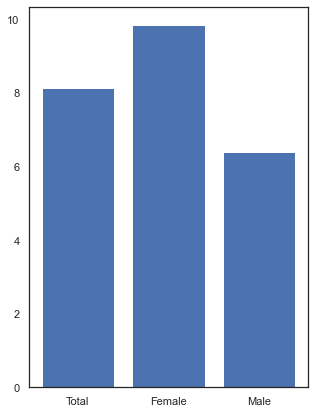

In [700]:
# A visual representation of the above statistics.
means = [mean_o, mean_f, mean_m]
labels = ['Total', 'Female', 'Male']

figure(figsize = (5,7))
plt.bar(labels, means)

In [596]:
# Make a dataframe for both men and women, to be used for plotting.
combined_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns = ['Male', 'Female'])

combined_df.reset_index(inplace=True)

combined_df = pd.melt(combined_df, id_vars="index", var_name="sex", value_name="difficulty")

In [601]:
combined_df

,index,sex,difficulty
0,5.11a,Male,6.961538461538462
1,5.12c,Male,3.5
2,5.13c,Male,0.375
3,5.12a,Male,6.987804878048781
4,5.11c,Male,4.733870967741935
5,5.10b,Male,4.60431654676259
6,5.10a,Male,6.211267605633803
7,5.10d,Male,4.246376811594203
8,5.12d,Male,8.642857142857142
9,5.13a,Male,5.24


In [602]:
# Make sure the difficulty column contains only float values.
combined_df['difficulty'] = pd.to_numeric(combined_df['difficulty'], downcast='float')

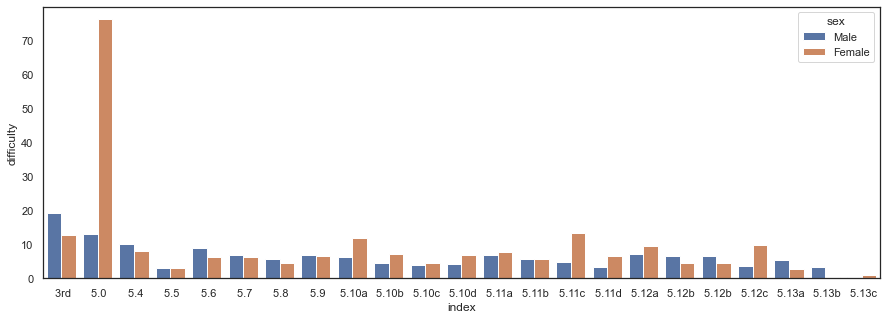

In [498]:
# Graph of ticks above Claimed Lead Grade
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="difficulty", hue="sex", data=combined_df,
    order = [' 3rd', ' 5.0', ' 5.4', ' 5.5', ' 5.6', ' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b', ' 5.12b', 
             ' 5.12c',' 5.13a', ' 5.13b', ' 5.13c'])
ax.grid(False)


It's kind of hard to see the difference in the mid-range grades, and there seems to be some outliers in 5.0. So I found the number of women represented for each grade, and removed the grades where less than ten women were represented for a grade, as you'll see in the graph below.

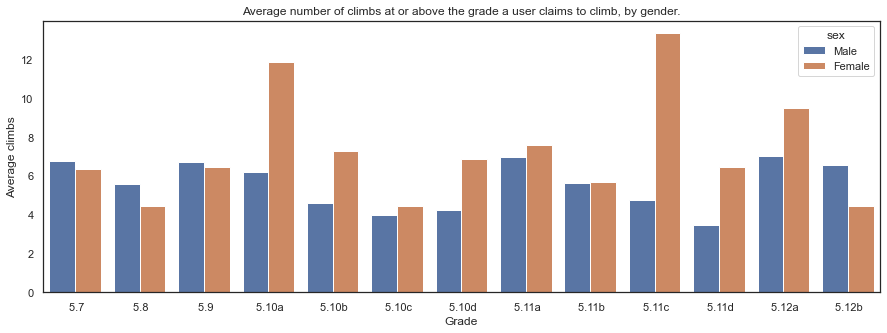

In [638]:
# I removed grades where fewer than 10 women were represented
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="difficulty", hue="sex", data=combined_df,
    order = [' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b'])
ax.set(xlabel='Grade', ylabel='Average climbs')
ax.set_title('Average number of climbs at or above the grade a user claims to climb, by gender.')
ax.grid(False)


## Plotting number of grades climbed by gender

In [574]:
lead_dict_count_men2 = lead_dict_count_men.copy()
lead_dict_count_women2 = lead_dict_count_women.copy()

In [575]:
# Turn women values into strings
for k, v in lead_dict_count_women2.items():
    lead_dict_count_women2[k] = str(v)

# Turn men values into strings
for k, v in lead_dict_count_men2.items():
    lead_dict_count_men2[k] = str(v) 

In [576]:
# Turn the women values into lists (to allow for extension when combining dictionaries).
lead_dict_count_women2_list = {}
key_list = list(lead_dict_count_women2.keys())
val_list = list(lead_dict_count_women2.values())

for index in range(len(lead_dict_count_women2)):
    lead_dict_count_women2_list[key_list[index]] = [val_list[index]]
    
# Turn the men values into lists (to allow for extension when combining dictionaries).
lead_dict_count_men2_list = {}
key_list = list(lead_dict_count_men2.keys())
val_list = list(lead_dict_count_men2.values())

for index in range(len(lead_dict_count_men2)):
    lead_dict_count_men2_list[key_list[index]] = [val_list[index]]

In [577]:
lead_dict_count_women2_list

{' 5.10b': ['36'],
 ' 5.12c': ['6'],
 ' 3rd': ['15'],
 ' 5.9': ['77'],
 ' 5.10c': ['34'],
 ' 5.10a': ['62'],
 ' 5.11a': ['39'],
 ' 5.11c': ['19'],
 ' 5.13a': ['6'],
 ' 5.12a': ['25'],
 ' 5.12b': ['13'],
 ' 5.10d': ['21'],
 ' 5.11b': ['23'],
 ' 5.7': ['22'],
 ' 5.8': ['38'],
 ' 5.12d': ['2'],
 ' 5.11d': ['9'],
 ' 5.4': ['1'],
 ' 5.0': ['1'],
 ' 5.13b': ['2'],
 ' 5.6': ['6'],
 ' 5.5': ['2'],
 ' 5.13c': ['1']}

In [578]:
# Combine male and female dictionaries
for k, v in lead_dict_count_women2_list.items():
    if k in lead_dict_count_men2_list:
        lead_dict_count_men2_list[k].extend(v)
    else:
        lead_dict_count_men2_list[k] = v

In [579]:
# first value represents men. Second represents women.
combined_count_dict = lead_dict_count_men2_list
combined_count_dict

{' 5.11a': ['234', '39'],
 ' 5.12c': ['58', '6'],
 ' 5.13c': ['8', '1'],
 ' 5.12a': ['164', '25'],
 ' 5.11c': ['124', '19'],
 ' 5.10b': ['139', '36'],
 ' 5.10a': ['213', '62'],
 ' 5.10d': ['138', '21'],
 ' 5.12d': ['28', '2'],
 ' 5.13a': ['50', '6'],
 ' 5.12b': ['73', '13'],
 ' 5.11d': ['84', '9'],
 ' 5.11b': ['99', '23'],
 ' 5.10c': ['123', '34'],
 ' 5.9': ['130', '77'],
 ' 5.7': ['47', '22'],
 ' 5.8': ['75', '38'],
 ' 5.6': ['6', '6'],
 ' 5.0': ['16', '1'],
 ' 3rd': ['34', '15'],
 ' 4th': ['3'],
 ' 5.14a': ['4'],
 ' 5.14b': ['1'],
 ' 5.13b': ['16', '2'],
 ' 5.13d': ['1'],
 ' 5.2': ['1'],
 ' 5.14d': ['1'],
 ' 5.4': ['1', '1'],
 ' 5.1': ['2'],
 ' 5.5': ['2', '2'],
 ' 5.3': ['1']}

In [580]:
# Remove keys where there are only women or only men.
keys_to_remove = []
for key in combined_count_dict:
    if len(combined_count_dict[key]) < 2:
        keys_to_remove.append(key)
        
[combined_count_dict.pop(key) for key in keys_to_remove] 

[['3'], ['4'], ['1'], ['1'], ['1'], ['1'], ['2'], ['1']]

In [581]:
# Make a combined count df for men and women, and get it into the right format for plotting.
combined_count_df = pd.DataFrame.from_dict(combined_count_dict, orient='index', columns = ['Male', 'Female'])

combined_count_df.reset_index(inplace=True)

combined_count_df = pd.melt(combined_count_df, id_vars="index", var_name="sex", value_name="count")

combined_count_df['count'] = pd.to_numeric(combined_count_df['count'], downcast='float')

In [585]:
combined_count_df

,index,sex,count
0,5.11a,Male,234.0
1,5.12c,Male,58.0
2,5.13c,Male,8.0
3,5.12a,Male,164.0
4,5.11c,Male,124.0
5,5.10b,Male,139.0
6,5.10a,Male,213.0
7,5.10d,Male,138.0
8,5.12d,Male,28.0
9,5.13a,Male,50.0


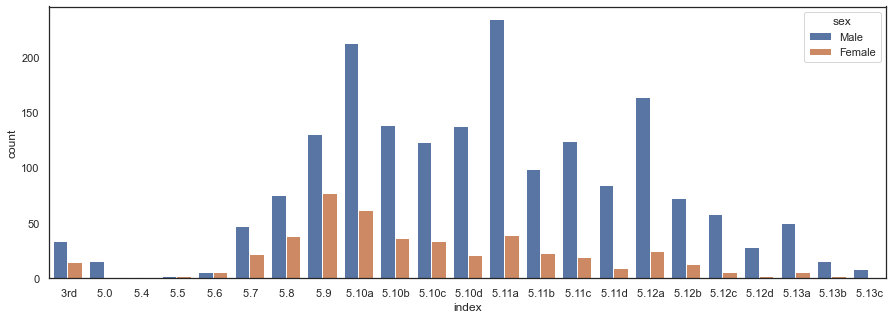

In [586]:
# Graph of the number of users who claim to climb each grade, by gender.
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="count", hue="sex", data=combined_count_df,
    order = [' 3rd', ' 5.0', ' 5.4', ' 5.5', ' 5.6', ' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b', ' 5.12c',
             ' 5.12d', ' 5.13a', ' 5.13b', ' 5.13c'])
ax.grid(False)

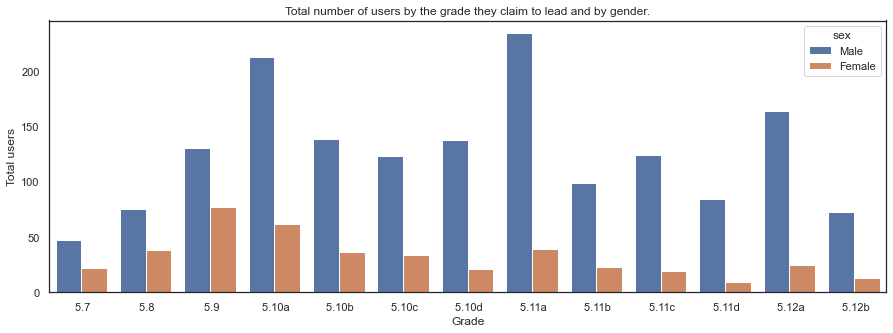

In [649]:
# Cutting off climbs where fewer than 10 women are represented
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="count", hue="sex", data=combined_count_df,
    order = [' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b'])
ax.set(xlabel='Grade', ylabel='Total users')
ax.set_title('Total number of users by the grade they claim to lead and by gender.')
ax.grid(False)

Interesting! There are more men and women who claim to climb grades that end in 'a' than their numerical counterparts that end in 'b', 'c', or 'd'.

## T-Test

A quick test to see if the difference in the averages is significant. The pvalue is less than .05, so the difference is definitely significant.

In [724]:
from scipy import stats
rvs1 = stats.norm.rvs(loc = 7.7,scale = 33,size = 459)
rvs2 = stats.norm.rvs(loc = 5.98,scale = 33,size = 1865)
print(stats.ttest_ind(rvs1,rvs2))

Ttest_indResult(statistic=2.553051397823751, pvalue=0.010741807093761949)


# Outliers - Follow

A repeat of the above analysis, but for what people claim to 'follow' rather than 'lead.' Again, I'm starting off with outlier removal because the outliers for followers is different from the outliers for lead climbers.
Some key statistics from this section:
* Number of women: 239
* Number of men: 697
* I removed users that had followed over 80 routes that were at or above their Claimed Follow Grade.

## Identification

In [514]:
# Make a df of just males
df_male = df_sport[df_sport['Gender'] == 'Male']

# Make a df of just male users with their lead ticks
df_male_follow = df_male[df_male['Style'] == 'Follow']

df_male_follow.shape

(2524, 18)

In [515]:
# df of just women
df_female = df_sport[df_sport['Gender'] == 'Female']

# df of women lead ticks
df_female_follow = df_female[df_female['Style'] == 'Follow']

df_female_follow.shape

(1596, 18)

In [516]:
print('Number of following women: ', len(df_female_follow.Name.unique()))
print('Number of following men: ', len(df_male_follow.Name.unique()))

Number of following women:  239
Number of following men:  697


In [517]:
df_follow = df_female_follow.append(df_male_follow)

In [518]:
df_follow

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month,sport_ticks_this_month,numerical_lead,numerical_follow
278,2018-01-07,Kristen Lutz,1,2018-01,Female,21.0,5.11b,Follow,NaN,1.0,5.10b,5.12b,15.0,15.0,13.000000,4,11.0,19.0
279,2018-01-07,Kristen Lutz,1,2018-01,Female,21.0,5.10d,Follow,NaN,1.0,5.10b,5.12b,13.0,15.0,13.000000,4,11.0,19.0
280,2018-01-07,Kristen Lutz,1,2018-01,Female,21.0,5.10a,Follow,NaN,1.0,5.10b,5.12b,10.0,15.0,13.000000,4,11.0,19.0
281,2017-12-18,Kristen Lutz,12,2017-12,Female,21.0,5.9+,Follow,NaN,1.0,5.10b,5.12b,9.0,16.0,11.750000,4,11.0,19.0
1685,2018-09-25,Avery Phillips,9,2018-09,Female,23.0,5.9,Follow,NaN,1.0,5.10b,5.11a,9.0,14.0,10.666667,3,11.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223742,2018-11-24,Monty Worth,11,2018-11,Male,53.0,5.10-,Follow,NaN,2.0,5.11a,5.11c,10.5,10.5,10.250000,2,14.0,16.0
223768,2016-12-27,Kneebar,12,2016-12,Male,52.0,5.11b,Follow,NaN,1.0,5.11c,5.11c,15.0,17.0,13.875000,4,16.0,16.0
223842,2020-11-22,Neal Lischner,11,2020-11,Male,61.0,5.9-,Follow,NaN,1.0,5.10a,5.11a,9.0,14.0,9.125000,8,10.0,14.0
223850,2020-10-07,Neal Lischner,10,2020-10,Male,61.0,5.10a/b,Follow,NaN,1.0,5.10a,5.11a,10.0,10.0,7.894737,19,10.0,14.0


In [519]:
# Get a list of the unique names
names = df_follow.Name.unique()

# Get the list of unique grades
the_follows = df_follow['Sport Follows'].unique()

# Make a dictionary with each grade and their average counts above the Climb Claim
follow_dict_full = {}
follow_dict = {}
for follow_grade in the_follows:
    count_above_follow = []
    for name in names:
        if len(df_follow[(df_follow.Name == name) & (df_follow['Sport Follows'] == follow_grade)]) == 0:
            x=0
        else:
            count_above_follow.append(len(df_follow[(df_follow.Name == name) & 
                                                       (df_follow['Sport Follows'] == follow_grade) &
                                                       (df_follow.numerical_difficulty >= df_follow.numerical_follow)]['numerical_difficulty']))
    follow_dict_full[follow_grade] = count_above_follow
    follow_dict[follow_grade] = mean(count_above_follow)

In [520]:
follow_dict_full

{' 5.12b': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0],
 ' 5.11a': [1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  2,
  6,
  1,
  3,
  0,
  0,
  0,
  1,
  0,
  1,
  3,
  0,
  0,
  2,
  0,
  2,
  0,
  0,
  0,
  0,
  12,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  2,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  2,
  0],
 ' 5.10b': [0,
  0,
  0,
  1,
  1,
  1,
  5,
  0,
  0,
  0,
  0,
  4,
  

In [521]:
# Get the dictionary into the right dataframe format for plotting.
desired_order_list = [' 3rd', ' 5.0', ' 5.5', ' 5.6', ' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b', ' 5.12c', 
             ' 5.12d',' 5.13a', ' 5.13b', ' 5.13c']

reordered_dict = {k: follow_dict_full[k] for k in desired_order_list}

all_grades = pd.DataFrame(list(reordered_dict.values()), index=reordered_dict.keys())

all_grades = all_grades.T

all_grades = pd.melt(all_grades, value_vars=all_grades.columns)

all_grades = all_grades.dropna()

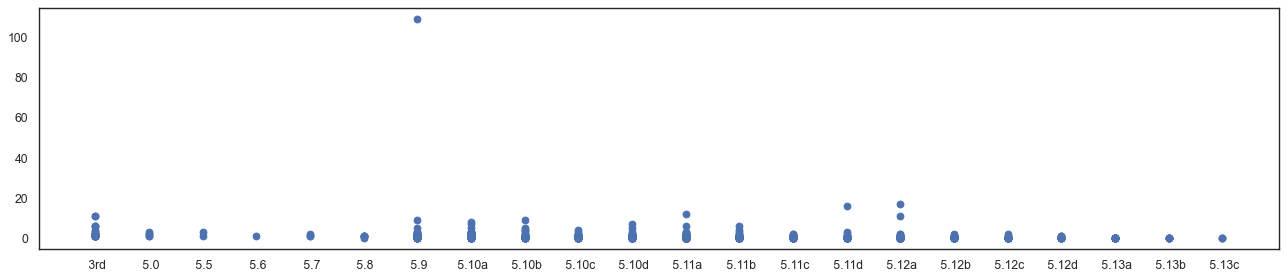

In [522]:
plt.figure(figsize=(20, 4), dpi=80)
plt.scatter(x=all_grades['variable'], y=all_grades['value'])

The above visual shows an outlier. I'll remove users that have climbed over 80 routes that are at or above their Claimed Follow Grade.

## Removal

In [258]:
names = df_sport_lead.Name.unique()

df = pd.DataFrame()
for name in names:
    user_df = df_follow[df_follow['Name'] == name]
    count_above_claim = len(user_df[user_df['numerical_follow'] <= user_df['numerical_difficulty']])
    user_df['above_claim'] = count_above_claim
    df = df.append(user_df)
    
df

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,Sport Leads,Sport Follows,numerical_difficulty,max_month,avg_month,sport_ticks_this_month,numerical_lead,numerical_follow,above_claim
237,2019-01-10,Alex Holmann,1,2019-01,Male,21.0,5.2,Follow,NaN,1.0,5.12c,3rd,2.0,14.0,9.722222,9,20.0,0.2,1
278,2018-01-07,Kristen Lutz,1,2018-01,Female,21.0,5.11b,Follow,NaN,1.0,5.10b,5.12b,15.0,15.0,13.000000,4,11.0,19.0,0
279,2018-01-07,Kristen Lutz,1,2018-01,Female,21.0,5.10d,Follow,NaN,1.0,5.10b,5.12b,13.0,15.0,13.000000,4,11.0,19.0,0
280,2018-01-07,Kristen Lutz,1,2018-01,Female,21.0,5.10a,Follow,NaN,1.0,5.10b,5.12b,10.0,15.0,13.000000,4,11.0,19.0,0
281,2017-12-18,Kristen Lutz,12,2017-12,Female,21.0,5.9+,Follow,NaN,1.0,5.10b,5.12b,9.0,16.0,11.750000,4,11.0,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224006,2017-05-07,Neal Lischner,5,2017-05,Male,61.0,5.8,Follow,NaN,1.0,5.10a,5.11a,8.0,10.0,9.000000,2,10.0,14.0,0
224094,2018-11-02,Tracey Pomeroy,11,2018-11,Female,65.0,5.10b,Follow,NaN,1.0,5.10a,5.10c,11.0,11.0,9.500000,8,10.0,12.0,0
224137,2017-10-15,Tracey Pomeroy,10,2017-10,Female,65.0,5.10b,Follow,NaN,1.0,5.10a,5.10c,11.0,11.0,8.600000,5,10.0,12.0,0
224144,2017-09-03,Tracey Pomeroy,9,2017-09,Female,65.0,5.10b,Follow,NaN,1.0,5.10a,5.10c,11.0,11.0,8.000000,6,10.0,12.0,0


In [260]:
# Remove outliers.
df = df[df['above_claim'] < 80]

In [261]:
df.shape

(3850, 19)

In [262]:
# Commented out to avoid writing over
# df.to_csv('df_sport_follow_no_outliers.csv')

In [264]:
df_sport3 = pd.read_csv('df_sport_follow_no_outliers.csv')

# Men - Follow

Key findings for men followers in the section below:
* There are 667 men.
* The average ticks above the Claimed Follow Grade is .46 and the standard deviation is 1.2.
* This differs by grade.

In [265]:
df_male_follow = df_sport3[df_sport3['Gender'] == 'Male']

In [266]:
# Get a list of the unique names
names = df_male_follow.Name.unique()
len(names)

667

In [268]:
# Make a list of the number of ticks for each user that are above what they claim they can lead climb.
count_above_follow = []
for name in names:
    df_male_follow[df_male_follow.Name == name]
    count_above_follow.append(len(df_male_follow[(df_male_follow.Name == name) & (df_male_follow.numerical_difficulty >= df_male_follow.numerical_follow)]['numerical_difficulty']))

In [269]:
# Find the average number of lead climbing ticks someone has that are at or above 
# what they claim to lead climb.
mean(count_above_follow)

0.46026986506746626

In [271]:
statistics.stdev(count_above_follow)

1.2779588827667634

## By Grade

In [289]:
# Get a list of the unique names
names = df_male_follow.Name.unique()

# Get the list of unique grades
the_follows = df_male_follow['Sport Follows'].unique()

# Make a dictionary with each grade and their average counts above the Climb Claim
follow_dict_full = {}
follow_dict = {}
for follow_grade in the_follows:
    count_above_follow = []
    for name in names:
        if len(df_male_follow[(df_male_follow.Name == name) & (df_male_follow['Sport Follows'] == follow_grade)]) == 0:
            x=0
        else:
            count_above_follow.append(len(df_male_follow[(df_male_follow.Name == name) & 
                                                       (df_male_follow['Sport Follows'] == follow_grade) &
                                                       (df_male_follow.numerical_difficulty >= df_male_follow.numerical_follow)]['numerical_difficulty']))
    follow_dict_full[follow_grade] = count_above_follow
    follow_dict[follow_grade] = mean(count_above_follow)

In [290]:
# Saving the mean counts in a dictionary
men_follow_dict = follow_dict

In [277]:
# Making a dictionary where the values are counts, to be used for demographic graphs.
follow_dict_count = follow_dict_full.copy()

# Turning the values into counts
for key in follow_dict_count:
    follow_dict_count[key] = len(follow_dict_count[key])
    
follow_dict_count_men = follow_dict_count.copy()

# Women - Follow

Key findings:
* There are 223 women.
* The average is .77 and the standard deviation is 1.7.
* This differs by grade.

In [278]:
df_female_follow = df_sport3[df_sport3['Gender'] == 'Female']

In [279]:
# Get a list of the unique names
names = df_female_follow.Name.unique()
len(names)

223

In [280]:
# Make a list of the number of ticks for each user that are above what they claim they can lead climb.
count_above_follow = []
for name in names:
    df_female_follow[df_female_follow.Name == name]
    count_above_follow.append(len(df_female_follow[(df_female_follow.Name == name) & (df_female_follow.numerical_difficulty >= df_female_follow.numerical_follow)]['numerical_difficulty']))

In [281]:
# Find the average number of lead climbing ticks someone has that are at or above 
# what they claim to lead climb.
mean(count_above_follow)

0.7713004484304933

In [282]:
statistics.stdev(count_above_follow)

1.779938660333369

## By Grade

In [283]:
# Get a list of the unique names
names = df_female_follow.Name.unique()

# Get the list of unique grades
the_follows = df_female_follow['Sport Follows'].unique()

# Make a dictionary with each grade and their average counts above the Climb Claim
follow_dict_full = {}
follow_dict = {}
for follow_grade in the_follows:
    count_above_follow = []
    for name in names:
        if len(df_female_follow[(df_female_follow.Name == name) & (df_female_follow['Sport Follows'] == follow_grade)]) == 0:
            x=0
        else:
            count_above_follow.append(len(df_female_follow[(df_female_follow.Name == name) & 
                                                       (df_female_follow['Sport Follows'] == follow_grade) &
                                                       (df_female_follow.numerical_difficulty >= df_female_follow.numerical_follow)]['numerical_difficulty']))
    follow_dict_full[follow_grade] = count_above_follow
    follow_dict[follow_grade] = mean(count_above_follow)

In [287]:
# Saving the mean counts in a dictionary
women_follow_dict = follow_dict

In [285]:
# Making a dictionary where the values are counts, to be used for demographic graphs.
follow_dict_count = follow_dict_full.copy()

# Turning the values into counts
for key in follow_dict_count:
    follow_dict_count[key] = len(follow_dict_count[key])
    
follow_dict_count_women = follow_dict_count.copy()

# Combined - Follow

What this section holds:
* After removing obscure grades that lacked either men or women, I recalculated the average grades above the Claimed Follow Grade, and these are the new statistics:
    * Female count average:  0.9489807936402364
    * Male count average:  0.5207679287685011
    * Total count average:  0.7348743612043687
* Graphs comparing the number of ticks above the CFG by gender, one with all grades and one with grades where more than ten women were represented.
* Graphs showing the number of men and women who claim to follow each grade, one with all grades and one with grades with more than ten women represented.

## Plotting number of grades above follow grade

In [617]:
# Copy dictionaries
women_follow_dict2 = women_follow_dict.copy()
men_follow_dict2 = men_follow_dict.copy()

In [618]:
# Turn women values into strings
for k, v in women_follow_dict2.items():
    women_follow_dict2[k] = str(v)

# Turn men values into strings
for k, v in men_follow_dict2.items():
    men_follow_dict2[k] = str(v) 

In [619]:
# Turn the women values into lists (to allow for extension when combining dictionaries).
women_follow_dict2_list = {}
key_list = list(women_follow_dict2.keys())
val_list = list(women_follow_dict2.values())

for index in range(len(women_follow_dict2)):
    women_follow_dict2_list[key_list[index]] = [val_list[index]]
    
# Turn the men values into lists (to allow for extension when combining dictionaries).
men_follow_dict2_list = {}
key_list = list(men_follow_dict2.keys())
val_list = list(men_follow_dict2.values())

for index in range(len(men_follow_dict2)):
    men_follow_dict2_list[key_list[index]] = [val_list[index]]

In [620]:
# Combine male and female dictionaries
for k, v in women_follow_dict2_list.items():
    if k in men_follow_dict2_list:
        men_follow_dict2_list[k].extend(v)
    else:
        men_follow_dict2_list[k] = v

In [621]:
# first value represents men. Second represents women.
combined_dict = men_follow_dict2_list
combined_dict

{' 3rd': ['2', '6'],
 ' 5.12a': ['0.2976190476190476', '0.8235294117647058'],
 ' 5.11a': ['0.20689655172413793', '1.027027027027027'],
 ' 5.12b': ['0.18421052631578946', '0.07692307692307693'],
 ' 5.13b': ['0'],
 ' 5.11c': ['0.18604651162790697', '0.3333333333333333'],
 ' 5.10d': ['0.4523809523809524', '0.5238095238095238'],
 ' 5.11d': ['0.5714285714285714', '0.15384615384615385'],
 ' 5.13c': ['0'],
 ' 5.12c': ['0.02564102564102564', '0.6'],
 ' 5.11b': ['0.4603174603174603', '0.6666666666666666'],
 ' 5.13a': ['0', '0'],
 ' 5.9': ['0.6956521739130435', '1.6666666666666667'],
 ' 5.8': ['1', '1'],
 ' 5.10a': ['0.7837837837837838', '0.9259259259259259'],
 ' 5.10c': ['0.5106382978723404', '0.3333333333333333'],
 ' 5.12d': ['0.14285714285714285', '0'],
 ' 5.10b': ['0.8148148148148148', '1.0526315789473684'],
 ' 4th': ['2'],
 ' 5.0': ['1.8'],
 ' 5.5': ['2'],
 ' 5.14a': ['0'],
 ' 5.3': ['2'],
 ' 5.6': ['1'],
 ' 5.7': ['1']}

In [622]:
# Remove keys where there are only women or only men.
keys_to_remove = []
for key in combined_dict:
    if len(combined_dict[key]) < 2:
        keys_to_remove.append(key)
        
[combined_dict.pop(key) for key in keys_to_remove] 

[['0'], ['0'], ['2'], ['1.8'], ['2'], ['0'], ['2'], ['1'], ['1']]

In [623]:
combined_dict

{' 3rd': ['2', '6'],
 ' 5.12a': ['0.2976190476190476', '0.8235294117647058'],
 ' 5.11a': ['0.20689655172413793', '1.027027027027027'],
 ' 5.12b': ['0.18421052631578946', '0.07692307692307693'],
 ' 5.11c': ['0.18604651162790697', '0.3333333333333333'],
 ' 5.10d': ['0.4523809523809524', '0.5238095238095238'],
 ' 5.11d': ['0.5714285714285714', '0.15384615384615385'],
 ' 5.12c': ['0.02564102564102564', '0.6'],
 ' 5.11b': ['0.4603174603174603', '0.6666666666666666'],
 ' 5.13a': ['0', '0'],
 ' 5.9': ['0.6956521739130435', '1.6666666666666667'],
 ' 5.8': ['1', '1'],
 ' 5.10a': ['0.7837837837837838', '0.9259259259259259'],
 ' 5.10c': ['0.5106382978723404', '0.3333333333333333'],
 ' 5.12d': ['0.14285714285714285', '0'],
 ' 5.10b': ['0.8148148148148148', '1.0526315789473684']}

In [625]:
# Print the averages for males and females
female_vals = []
male_vals = []
overall_vals = []
for key in combined_dict:
    male_vals.append(float(combined_dict[key][0]))
    female_vals.append(float(combined_dict[key][1]))
    overall_vals.append(float(combined_dict[key][0]))
    overall_vals.append(float(combined_dict[key][1]))
    
mean_f = mean(female_vals)
mean_m = mean(male_vals)
mean_o = mean(overall_vals)

print('Female count average: ', mean_f)
print('Male count average: ', mean_m)
print('Total count average: ', mean_o)

Female count average:  0.9489807936402364
Male count average:  0.5207679287685011
Total count average:  0.7348743612043687


In [297]:
# Turn dictionary into dataframe, and get it into a plot-able format.
combined_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns = ['Male', 'Female'])

combined_df.reset_index(inplace=True)

combined_df = pd.melt(combined_df, id_vars="index", var_name="sex", value_name="difficulty")

combined_df['difficulty'] = pd.to_numeric(combined_df['difficulty'], downcast='float')

In [305]:
combined_df

,index,sex,difficulty
0,3rd,Male,2.000000
1,5.12a,Male,0.297619
2,5.11a,Male,0.206897
3,5.12b,Male,0.184211
4,5.11c,Male,0.186047
5,5.10d,Male,0.452381
6,5.11d,Male,0.571429
7,5.12c,Male,0.025641
8,5.11b,Male,0.460317
9,5.13a,Male,0.000000


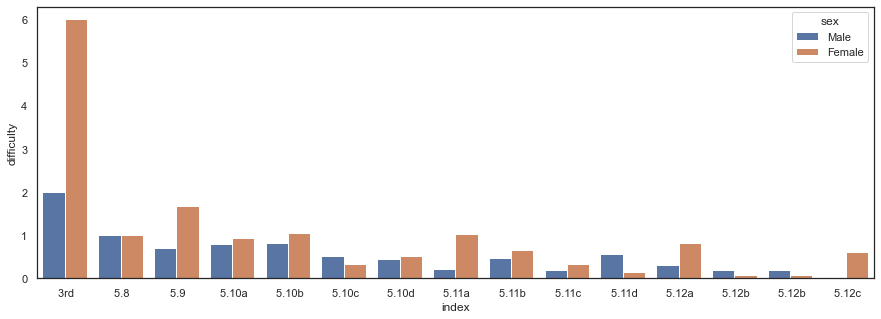

In [306]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="difficulty", hue="sex", data=combined_df,
    order = [' 3rd', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b', ' 5.12b', 
             ' 5.12c'])
ax.grid(False)

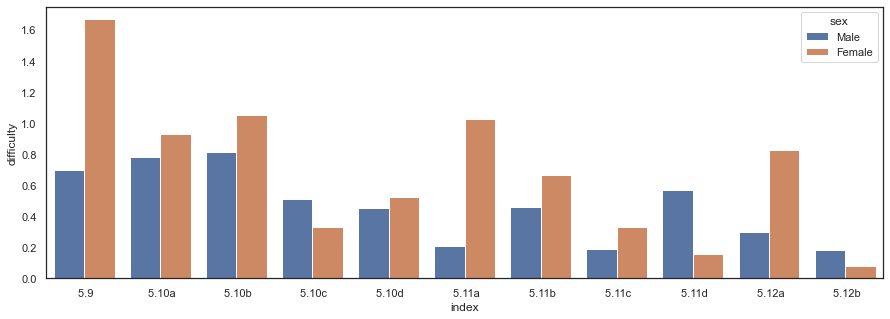

In [319]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="difficulty", hue="sex", data=combined_df,
    order = [' 5.9', ' 5.10a', ' 5.10b', ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', 
             ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b'])
ax.grid(False)

## Plotting number of grades by gender

In [308]:
follow_dict_count_men2 = follow_dict_count_men.copy()
follow_dict_count_women2 = follow_dict_count_women.copy()

In [309]:
# Turn women values into strings
for k, v in follow_dict_count_women2.items():
    follow_dict_count_women2[k] = str(v)

# Turn men values into strings
for k, v in follow_dict_count_men2.items():
    follow_dict_count_men2[k] = str(v) 

In [310]:
# Turn the women values into lists (to allow for extension when combining dictionaries).
follow_dict_count_women2_list = {}
key_list = list(follow_dict_count_women2.keys())
val_list = list(follow_dict_count_women2.values())

for index in range(len(follow_dict_count_women2)):
    follow_dict_count_women2_list[key_list[index]] = [val_list[index]]
    
# Turn the men values into lists (to allow for extension when combining dictionaries).
follow_dict_count_men2_list = {}
key_list = list(follow_dict_count_men2.keys())
val_list = list(follow_dict_count_men2.values())

for index in range(len(follow_dict_count_men2)):
    follow_dict_count_men2_list[key_list[index]] = [val_list[index]]

In [311]:
# Combine male and female dictionaries
for k, v in follow_dict_count_women2_list.items():
    if k in follow_dict_count_men2_list:
        follow_dict_count_men2_list[k].extend(v)
    else:
        follow_dict_count_men2_list[k] = v

In [312]:
# first value represents men. Second represents women.
combined_count_dict = follow_dict_count_men2_list
combined_count_dict

{' 3rd': ['27', '2'],
 ' 5.12a': ['84', '17'],
 ' 5.11a': ['87', '37'],
 ' 5.12b': ['38', '13'],
 ' 5.13b': ['6'],
 ' 5.11c': ['43', '15'],
 ' 5.10d': ['42', '21'],
 ' 5.11d': ['42', '13'],
 ' 5.13c': ['3'],
 ' 5.12c': ['39', '5'],
 ' 5.11b': ['63', '12'],
 ' 5.13a': ['22', '3'],
 ' 5.9': ['23', '15'],
 ' 5.8': ['4', '1'],
 ' 5.10a': ['37', '27'],
 ' 5.10c': ['47', '15'],
 ' 5.12d': ['21', '6'],
 ' 5.10b': ['27', '19'],
 ' 4th': ['4'],
 ' 5.0': ['5'],
 ' 5.5': ['2'],
 ' 5.14a': ['1'],
 ' 5.3': ['1'],
 ' 5.6': ['1'],
 ' 5.7': ['2']}

In [313]:
# Remove keys where there are only women or only men.
keys_to_remove = []
for key in combined_count_dict:
    if len(combined_count_dict[key]) < 2:
        keys_to_remove.append(key)
        
[combined_count_dict.pop(key) for key in keys_to_remove] 

[['6'], ['3'], ['4'], ['5'], ['2'], ['1'], ['1'], ['1'], ['2']]

In [320]:
combined_count_dict

{' 3rd': ['27', '2'],
 ' 5.12a': ['84', '17'],
 ' 5.11a': ['87', '37'],
 ' 5.12b': ['38', '13'],
 ' 5.11c': ['43', '15'],
 ' 5.10d': ['42', '21'],
 ' 5.11d': ['42', '13'],
 ' 5.12c': ['39', '5'],
 ' 5.11b': ['63', '12'],
 ' 5.13a': ['22', '3'],
 ' 5.9': ['23', '15'],
 ' 5.8': ['4', '1'],
 ' 5.10a': ['37', '27'],
 ' 5.10c': ['47', '15'],
 ' 5.12d': ['21', '6'],
 ' 5.10b': ['27', '19']}

In [314]:
# Moving from dictionary to a dataframe in a plot-able format.
combined_count_df = pd.DataFrame.from_dict(combined_count_dict, orient='index', columns = ['Male', 'Female'])

combined_count_df.reset_index(inplace=True)

combined_count_df = pd.melt(combined_count_df, id_vars="index", var_name="sex", value_name="count")

combined_count_df['count'] = pd.to_numeric(combined_count_df['count'], downcast='float')

combined_count_df

,index,sex,count
0,3rd,Male,27.0
1,5.12a,Male,84.0
2,5.11a,Male,87.0
3,5.12b,Male,38.0
4,5.11c,Male,43.0
5,5.10d,Male,42.0
6,5.11d,Male,42.0
7,5.12c,Male,39.0
8,5.11b,Male,63.0
9,5.13a,Male,22.0


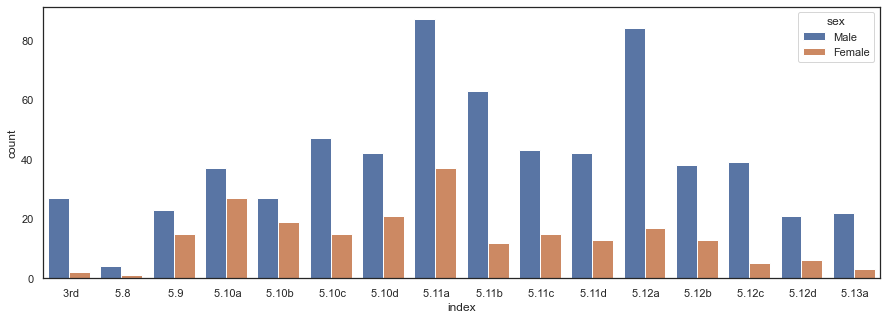

In [316]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="count", hue="sex", data=combined_count_df,
    order = [' 3rd', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b', ' 5.12c',
             ' 5.12d', ' 5.13a'])
ax.grid(False)

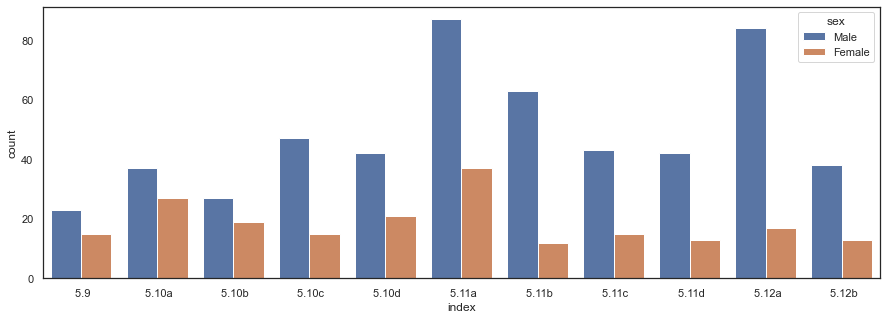

In [318]:
# Cutting off climbs where fewer than 10 women are represented
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="count", hue="sex", data=combined_count_df,
    order = [' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b'])
ax.grid(False)

# Women - Lead Send

Key findings of this section:
* Total women is 406.
* Percent of female leads that are sends:  59.21 %
* Average climbs at or above climb claim, women:  3.57. Standard deviation is 7.0.

In [659]:
df_female_lead.shape

(17721, 20)

In [660]:
df_female_lead['Lead Style'].unique()

array(['Onsight', 'Fell/Hung', 'Pinkpoint', 'Redpoint', nan, 'Flash'],
      dtype=object)

In [661]:
df_female_lead_send = df_female_lead[(df_female_lead['Lead Style'] == 'Onsight') |
                                    (df_female_lead['Lead Style'] == 'Pinkpoint') |
                                    (df_female_lead['Lead Style'] == 'Redpoint') |
                                    (df_female_lead['Lead Style'] == 'Flash')]

In [662]:
df_female_lead_send.shape

(10493, 20)

In [663]:
print('Percent of female leads that are sends: ', round(((df_female_lead_send.shape[0]/df_female_lead.shape[0]) * 100), 2), '%' )

Percent of female leads that are sends:  59.21 %


In [664]:
# Total number of women
names = df_female_lead_send.Name.unique()
len(names)

403

In [665]:
names = df_female_lead_send.Name.unique()

count_above_lead = []
for name in names:
    df_female_lead_send[df_female_lead_send.Name == name]
    count_above_lead.append(len(df_female_lead_send[(df_female_lead_send.Name == name) & (df_female_lead_send.numerical_difficulty >= df_female_lead_send.numerical_lead)]['numerical_difficulty']))

In [666]:
print('Average climbs at or above climb claim, women: ', mean(count_above_lead))

Average climbs at or above climb claim, women:  3.5732009925558312


In [531]:
statistics.stdev(count_above_lead)

7.044738089740018

In [532]:
# Make a dictionary where the keys are the difficulty levels and the keys are the average count of  
# ticks of that grade or above from women who claim to climb that grade.
names = df_female_lead_send.Name.unique()
the_leads = df_female_lead_send['Sport Leads'].unique()

lead_dict_full = {}
lead_dict = {}
for lead_grade in the_leads:
    count_above_lead = []
    for name in names:
        if len(df_female_lead_send[(df_female_lead_send.Name == name) & (df_female_lead_send['Sport Leads'] == lead_grade)]) == 0:
            x=0
        else:
            count_above_lead.append(len(df_female_lead_send[(df_female_lead_send.Name == name) & 
                                                       (df_female_lead_send['Sport Leads'] == lead_grade) &
                                                       (df_female_lead_send.numerical_difficulty >= df_female_lead_send.numerical_lead)]['numerical_difficulty']))
    lead_dict_full[lead_grade] = count_above_lead
    lead_dict[lead_grade] = mean(count_above_lead)

In [533]:
# Making a dictionary where the values are the counts
lead_dict_count = lead_dict_full.copy()

for key in lead_dict_count:
    lead_dict_count[key] = len(lead_dict_count[key])
    
lead_send_dict_count_women = lead_dict_count.copy()

In [534]:
# Save the lead dictionary in a new dict called women_lead_dict
women_lead_send_dict = lead_dict

In [535]:
lead_send_dict_count_women

{' 5.10b': 28,
 ' 5.12c': 6,
 ' 3rd': 15,
 ' 5.9': 65,
 ' 5.10c': 30,
 ' 5.10a': 53,
 ' 5.11a': 37,
 ' 5.11c': 18,
 ' 5.13a': 6,
 ' 5.12a': 22,
 ' 5.12b': 13,
 ' 5.10d': 19,
 ' 5.11b': 20,
 ' 5.7': 21,
 ' 5.8': 30,
 ' 5.12d': 2,
 ' 5.11d': 8,
 ' 5.4': 1,
 ' 5.0': 1,
 ' 5.13b': 2,
 ' 5.6': 5,
 ' 5.13c': 1,
 ' 5.5': 1}

In [536]:
women_lead_send_dict

{' 5.10b': 2.75,
 ' 5.12c': 3.5,
 ' 3rd': 8.733333333333333,
 ' 5.9': 3.1384615384615384,
 ' 5.10c': 1.3333333333333333,
 ' 5.10a': 5.018867924528302,
 ' 5.11a': 2.1621621621621623,
 ' 5.11c': 4.833333333333333,
 ' 5.13a': 1.8333333333333333,
 ' 5.12a': 4.863636363636363,
 ' 5.12b': 2.6923076923076925,
 ' 5.10d': 2.473684210526316,
 ' 5.11b': 2.25,
 ' 5.7': 4.619047619047619,
 ' 5.8': 2.7333333333333334,
 ' 5.12d': 8.5,
 ' 5.11d': 1.75,
 ' 5.4': 4,
 ' 5.0': 43,
 ' 5.13b': 0,
 ' 5.6': 5.8,
 ' 5.13c': 1,
 ' 5.5': 2}

# Men - Lead Send

Key findings of this section:
* Number of men is 1,701.
* Percent of male leads that are sends:  68.88 %.
* Average climbs at or above climb claim, men:  3.07, and the standard deviation is 6.9.

In [537]:
df_male_lead.shape

(83388, 20)

In [538]:
df_male_lead_send = df_male_lead[(df_male_lead['Lead Style'] == 'Onsight') |
                                    (df_male_lead['Lead Style'] == 'Pinkpoint') |
                                    (df_male_lead['Lead Style'] == 'Redpoint') |
                                    (df_male_lead['Lead Style'] == 'Flash')]

In [539]:
df_male_lead_send.shape

(57436, 20)

In [540]:
print('Percent of male leads that are sends: ', round(((df_male_lead_send.shape[0]/df_male_lead.shape[0]) * 100), 2), '%' )

Percent of male leads that are sends:  68.88 %


In [541]:
# Total number of men
names = df_male_lead_send.Name.unique()
len(names)

1701

In [542]:
names = df_male_lead_send.Name.unique()

count_above_lead = []
for name in names:
    df_male_lead_send[df_male_lead_send.Name == name]
    count_above_lead.append(len(df_male_lead_send[(df_male_lead_send.Name == name) & (df_male_lead_send.numerical_difficulty >= df_male_lead_send.numerical_lead)]['numerical_difficulty']))

In [543]:
print('Average climbs at or above climb claim, men: ', mean(count_above_lead))

Average climbs at or above climb claim, men:  3.070546737213404


In [544]:
statistics.stdev(count_above_lead)

6.918667603432393

In [545]:
# Make a dictionary where the keys are the difficulty levels and the keys are the average count of  
# ticks of that grade or above from women who claim to climb that grade.
names = df_male_lead_send.Name.unique()
the_leads = df_male_lead_send['Sport Leads'].unique()

lead_dict_full = {}
lead_dict = {}
for lead_grade in the_leads:
    count_above_lead = []
    for name in names:
        if len(df_male_lead_send[(df_male_lead_send.Name == name) & (df_male_lead_send['Sport Leads'] == lead_grade)]) == 0:
            x=0
        else:
            count_above_lead.append(len(df_male_lead_send[(df_male_lead_send.Name == name) & 
                                                       (df_male_lead_send['Sport Leads'] == lead_grade) &
                                                       (df_male_lead_send.numerical_difficulty >= df_male_lead_send.numerical_lead)]['numerical_difficulty']))
    lead_dict_full[lead_grade] = count_above_lead
    lead_dict[lead_grade] = mean(count_above_lead)

In [546]:
# Making a dictionary where the values are the counts
lead_dict_count = lead_dict_full.copy()

for key in lead_dict_count:
    lead_dict_count[key] = len(lead_dict_count[key])
    
lead_send_dict_count_men = lead_dict_count.copy()

In [547]:
# Save the lead dictionary in a new dict
men_lead_send_dict = lead_dict

In [548]:
lead_send_dict_count_men

{' 5.11a': 219,
 ' 5.12c': 54,
 ' 5.13c': 8,
 ' 5.12a': 161,
 ' 5.11c': 114,
 ' 5.10b': 132,
 ' 5.10a': 192,
 ' 5.10d': 124,
 ' 5.12d': 27,
 ' 5.13a': 50,
 ' 5.12b': 70,
 ' 5.11d': 72,
 ' 5.11b': 89,
 ' 5.10c': 104,
 ' 5.9': 111,
 ' 5.7': 41,
 ' 5.8': 62,
 ' 5.0': 14,
 ' 5.6': 5,
 ' 3rd': 30,
 ' 4th': 3,
 ' 5.14a': 4,
 ' 5.14b': 1,
 ' 5.13b': 16,
 ' 5.13d': 1,
 ' 5.2': 1,
 ' 5.14d': 1,
 ' 5.4': 1,
 ' 5.1': 2,
 ' 5.5': 1,
 ' 5.3': 1}

In [549]:
men_lead_send_dict

{' 5.11a': 2.730593607305936,
 ' 5.12c': 1.4444444444444444,
 ' 5.13c': 0.375,
 ' 5.12a': 2.937888198757764,
 ' 5.11c': 2.0526315789473686,
 ' 5.10b': 2.5833333333333335,
 ' 5.10a': 3.5989583333333335,
 ' 5.10d': 1.7338709677419355,
 ' 5.12d': 3,
 ' 5.13a': 1.9,
 ' 5.12b': 2.9285714285714284,
 ' 5.11d': 1.3055555555555556,
 ' 5.11b': 2.797752808988764,
 ' 5.10c': 1.6442307692307692,
 ' 5.9': 4.783783783783784,
 ' 5.7': 6.024390243902439,
 ' 5.8': 4,
 ' 5.0': 8.928571428571429,
 ' 5.6': 3.2,
 ' 3rd': 13.066666666666666,
 ' 4th': 30,
 ' 5.14a': 1.25,
 ' 5.14b': 0,
 ' 5.13b': 0.4375,
 ' 5.13d': 0,
 ' 5.2': 6,
 ' 5.14d': 0,
 ' 5.4': 7,
 ' 5.1': 6,
 ' 5.5': 5,
 ' 5.3': 4}

# Combined - Lead Send

Key Findings from this section:
* Statistics after removing grades with fewer than ten women:
    * Female count average:  5.173253659884202
    * Male count average:  3.629293180397172
    * Total count average:  4.401273420140687
* A graph of average ticks above the Claimed Lead Send Grade for men and women.
* A graph showing the number of users who claimed to climb each grade, by gender.

## Graphing average count above lead send claim

In [640]:
# Copy dictionaries
women_lead_send_dict2 = women_lead_send_dict.copy()
men_lead_send_dict2 = men_lead_send_dict.copy()

In [641]:
# Turn women values into strings
for k, v in women_lead_send_dict2.items():
    women_lead_send_dict2[k] = str(v)

# Turn men values into strings
for k, v in men_lead_send_dict2.items():
    men_lead_send_dict2[k] = str(v)  

In [642]:
# Turn the women values into lists (to allow for extension when combining dictionaries).
women_lead_send_dict2_list = {}
key_list = list(women_lead_send_dict2.keys())
val_list = list(women_lead_send_dict2.values())

for index in range(len(women_lead_send_dict2)):
    women_lead_send_dict2_list[key_list[index]] = [val_list[index]]
    
# Turn the men values into lists (to allow for extension when combining dictionaries).
men_lead_send_dict2_list = {}
key_list = list(men_lead_send_dict2.keys())
val_list = list(men_lead_send_dict2.values())

for index in range(len(men_lead_send_dict2)):
    men_lead_send_dict2_list[key_list[index]] = [val_list[index]]

In [643]:
women_lead_send_dict2_list

{' 5.10b': ['2.75'],
 ' 5.12c': ['3.5'],
 ' 3rd': ['8.733333333333333'],
 ' 5.9': ['3.1384615384615384'],
 ' 5.10c': ['1.3333333333333333'],
 ' 5.10a': ['5.018867924528302'],
 ' 5.11a': ['2.1621621621621623'],
 ' 5.11c': ['4.833333333333333'],
 ' 5.13a': ['1.8333333333333333'],
 ' 5.12a': ['4.863636363636363'],
 ' 5.12b': ['2.6923076923076925'],
 ' 5.10d': ['2.473684210526316'],
 ' 5.11b': ['2.25'],
 ' 5.7': ['4.619047619047619'],
 ' 5.8': ['2.7333333333333334'],
 ' 5.12d': ['8.5'],
 ' 5.11d': ['1.75'],
 ' 5.4': ['4'],
 ' 5.0': ['43'],
 ' 5.13b': ['0'],
 ' 5.6': ['5.8'],
 ' 5.13c': ['1'],
 ' 5.5': ['2']}

In [644]:
# Combine male and female dictionaries
for k, v in women_lead_send_dict2_list.items():
    if k in men_lead_send_dict2_list:
        men_lead_send_dict2_list[k].extend(v)
    else:
        men_lead_send_dict2_list[k] = v
        
# first value represents men. Second represents women.
combined_dict = men_lead_send_dict2_list
combined_dict

{' 5.11a': ['2.730593607305936', '2.1621621621621623'],
 ' 5.12c': ['1.4444444444444444', '3.5'],
 ' 5.13c': ['0.375', '1'],
 ' 5.12a': ['2.937888198757764', '4.863636363636363'],
 ' 5.11c': ['2.0526315789473686', '4.833333333333333'],
 ' 5.10b': ['2.5833333333333335', '2.75'],
 ' 5.10a': ['3.5989583333333335', '5.018867924528302'],
 ' 5.10d': ['1.7338709677419355', '2.473684210526316'],
 ' 5.12d': ['3', '8.5'],
 ' 5.13a': ['1.9', '1.8333333333333333'],
 ' 5.12b': ['2.9285714285714284', '2.6923076923076925'],
 ' 5.11d': ['1.3055555555555556', '1.75'],
 ' 5.11b': ['2.797752808988764', '2.25'],
 ' 5.10c': ['1.6442307692307692', '1.3333333333333333'],
 ' 5.9': ['4.783783783783784', '3.1384615384615384'],
 ' 5.7': ['6.024390243902439', '4.619047619047619'],
 ' 5.8': ['4', '2.7333333333333334'],
 ' 5.0': ['8.928571428571429', '43'],
 ' 5.6': ['3.2', '5.8'],
 ' 3rd': ['13.066666666666666', '8.733333333333333'],
 ' 4th': ['30'],
 ' 5.14a': ['1.25'],
 ' 5.14b': ['0'],
 ' 5.13b': ['0.4375', '0'

In [645]:
# Remove keys where there are only women or only men.
keys_to_remove = []
for key in combined_dict:
    if len(combined_dict[key]) < 2:
        keys_to_remove.append(key)
        
[combined_dict.pop(key) for key in keys_to_remove] 

[['30'], ['1.25'], ['0'], ['0'], ['6'], ['0'], ['6'], ['4']]

In [646]:
combined_dict

{' 5.11a': ['2.730593607305936', '2.1621621621621623'],
 ' 5.12c': ['1.4444444444444444', '3.5'],
 ' 5.13c': ['0.375', '1'],
 ' 5.12a': ['2.937888198757764', '4.863636363636363'],
 ' 5.11c': ['2.0526315789473686', '4.833333333333333'],
 ' 5.10b': ['2.5833333333333335', '2.75'],
 ' 5.10a': ['3.5989583333333335', '5.018867924528302'],
 ' 5.10d': ['1.7338709677419355', '2.473684210526316'],
 ' 5.12d': ['3', '8.5'],
 ' 5.13a': ['1.9', '1.8333333333333333'],
 ' 5.12b': ['2.9285714285714284', '2.6923076923076925'],
 ' 5.11d': ['1.3055555555555556', '1.75'],
 ' 5.11b': ['2.797752808988764', '2.25'],
 ' 5.10c': ['1.6442307692307692', '1.3333333333333333'],
 ' 5.9': ['4.783783783783784', '3.1384615384615384'],
 ' 5.7': ['6.024390243902439', '4.619047619047619'],
 ' 5.8': ['4', '2.7333333333333334'],
 ' 5.0': ['8.928571428571429', '43'],
 ' 5.6': ['3.2', '5.8'],
 ' 3rd': ['13.066666666666666', '8.733333333333333'],
 ' 5.13b': ['0.4375', '0'],
 ' 5.4': ['7', '4'],
 ' 5.5': ['5', '2']}

In [647]:
# Print the averages for males and females
female_vals = []
male_vals = []
overall_vals = []
for key in combined_dict:
    male_vals.append(float(combined_dict[key][0]))
    female_vals.append(float(combined_dict[key][1]))
    overall_vals.append(float(combined_dict[key][0]))
    overall_vals.append(float(combined_dict[key][1]))
    
mean_f = mean(female_vals)
mean_m = mean(male_vals)
mean_o = mean(overall_vals)

print('Female count average: ', mean_f)
print('Male count average: ', mean_m)
print('Total count average: ', mean_o)

Female count average:  5.173253659884202
Male count average:  3.629293180397172
Total count average:  4.401273420140687


In [557]:
combined_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns = ['Male', 'Female'])
combined_df

,Male,Female
5.11a,2.730593607305936,2.1621621621621623
5.12c,1.4444444444444444,3.5
5.13c,0.375,1
5.12a,2.937888198757764,4.863636363636363
5.11c,2.0526315789473686,4.833333333333333
5.10b,2.5833333333333335,2.75
5.10a,3.5989583333333335,5.018867924528302
5.10d,1.7338709677419355,2.473684210526316
5.12d,3,8.5
5.13a,1.9,1.8333333333333333


In [558]:
combined_df.reset_index(inplace=True)

combined_df = pd.melt(combined_df, id_vars="index", var_name="sex", value_name="difficulty")

In [560]:
combined_df

,index,sex,difficulty
0,5.11a,Male,2.730593607305936
1,5.12c,Male,1.4444444444444444
2,5.13c,Male,0.375
3,5.12a,Male,2.937888198757764
4,5.11c,Male,2.0526315789473686
5,5.10b,Male,2.5833333333333335
6,5.10a,Male,3.5989583333333335
7,5.10d,Male,1.7338709677419355
8,5.12d,Male,3
9,5.13a,Male,1.9


In [561]:
combined_df['difficulty'] = pd.to_numeric(combined_df['difficulty'], downcast='float')

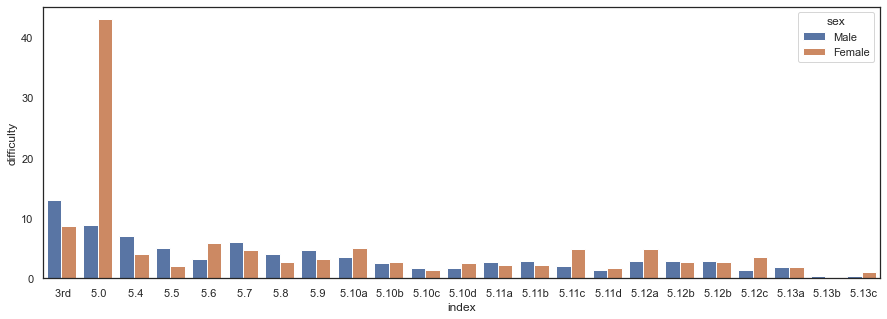

In [562]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="difficulty", hue="sex", data=combined_df,
    order = [' 3rd', ' 5.0', ' 5.4', ' 5.5', ' 5.6', ' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b', ' 5.12b', 
             ' 5.12c',' 5.13a', ' 5.13b', ' 5.13c'])
ax.grid(False)

In [563]:
[' 3rd', ' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.12a', ' 5.12b']

[' 3rd',
 ' 5.7',
 ' 5.8',
 ' 5.9',
 ' 5.10a',
 ' 5.10b',
 ' 5.10c',
 ' 5.10d',
 ' 5.11a',
 ' 5.11b',
 ' 5.11c',
 ' 5.12a',
 ' 5.12b']

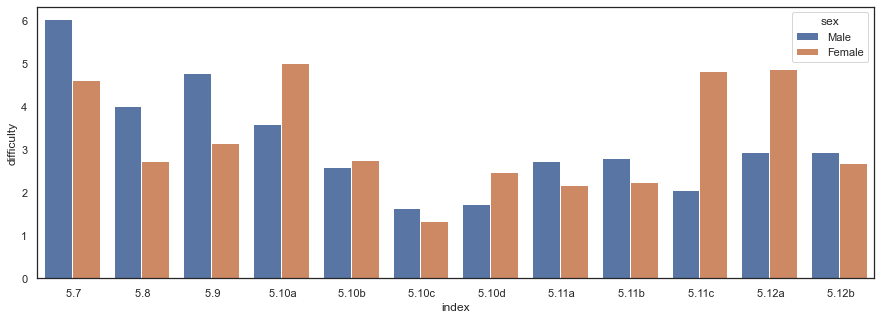

In [564]:
# After grades with fewer than ten women has been removed
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="difficulty", hue="sex", data=combined_df,
    order = [' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.12a', ' 5.12b'])
ax.grid(False)

## Graphing average count of grades by gender

In [565]:
lead_send_dict_count_men2 = lead_send_dict_count_men.copy()
lead_send_dict_count_women2 = lead_send_dict_count_women.copy()

In [566]:
# Turn women values into strings
for k, v in lead_send_dict_count_women2.items():
    lead_send_dict_count_women2[k] = str(v)

# Turn men values into strings
for k, v in lead_send_dict_count_men2.items():
    lead_send_dict_count_men2[k] = str(v) 

In [567]:
# Turn the women values into lists (to allow for extension when combining dictionaries).
lead_send_dict_count_women2_list = {}
key_list = list(lead_send_dict_count_women2.keys())
val_list = list(lead_send_dict_count_women2.values())

for index in range(len(lead_send_dict_count_women2)):
    lead_send_dict_count_women2_list[key_list[index]] = [val_list[index]]
    
# Turn the men values into lists (to allow for extension when combining dictionaries).
lead_send_dict_count_men2_list = {}
key_list = list(lead_send_dict_count_men2.keys())
val_list = list(lead_send_dict_count_men2.values())

for index in range(len(lead_send_dict_count_men2)):
    lead_send_dict_count_men2_list[key_list[index]] = [val_list[index]]

In [568]:
lead_send_dict_count_women2_list

{' 5.10b': ['28'],
 ' 5.12c': ['6'],
 ' 3rd': ['15'],
 ' 5.9': ['65'],
 ' 5.10c': ['30'],
 ' 5.10a': ['53'],
 ' 5.11a': ['37'],
 ' 5.11c': ['18'],
 ' 5.13a': ['6'],
 ' 5.12a': ['22'],
 ' 5.12b': ['13'],
 ' 5.10d': ['19'],
 ' 5.11b': ['20'],
 ' 5.7': ['21'],
 ' 5.8': ['30'],
 ' 5.12d': ['2'],
 ' 5.11d': ['8'],
 ' 5.4': ['1'],
 ' 5.0': ['1'],
 ' 5.13b': ['2'],
 ' 5.6': ['5'],
 ' 5.13c': ['1'],
 ' 5.5': ['1']}

In [569]:
# Combine male and female dictionaries
for k, v in lead_send_dict_count_women2_list.items():
    if k in lead_send_dict_count_men2_list:
        lead_send_dict_count_men2_list[k].extend(v)
    else:
        lead_send_dict_count_men2_list[k] = v
        
# first value represents men. Second represents women.
combined_count_dict = lead_send_dict_count_men2_list
combined_count_dict

{' 5.11a': ['219', '37'],
 ' 5.12c': ['54', '6'],
 ' 5.13c': ['8', '1'],
 ' 5.12a': ['161', '22'],
 ' 5.11c': ['114', '18'],
 ' 5.10b': ['132', '28'],
 ' 5.10a': ['192', '53'],
 ' 5.10d': ['124', '19'],
 ' 5.12d': ['27', '2'],
 ' 5.13a': ['50', '6'],
 ' 5.12b': ['70', '13'],
 ' 5.11d': ['72', '8'],
 ' 5.11b': ['89', '20'],
 ' 5.10c': ['104', '30'],
 ' 5.9': ['111', '65'],
 ' 5.7': ['41', '21'],
 ' 5.8': ['62', '30'],
 ' 5.0': ['14', '1'],
 ' 5.6': ['5', '5'],
 ' 3rd': ['30', '15'],
 ' 4th': ['3'],
 ' 5.14a': ['4'],
 ' 5.14b': ['1'],
 ' 5.13b': ['16', '2'],
 ' 5.13d': ['1'],
 ' 5.2': ['1'],
 ' 5.14d': ['1'],
 ' 5.4': ['1', '1'],
 ' 5.1': ['2'],
 ' 5.5': ['1', '1'],
 ' 5.3': ['1']}

In [570]:
# Remove keys where there are only women or only men.
keys_to_remove = []
for key in combined_count_dict:
    if len(combined_count_dict[key]) < 2:
        keys_to_remove.append(key)
        
[combined_count_dict.pop(key) for key in keys_to_remove] 

[['3'], ['4'], ['1'], ['1'], ['1'], ['1'], ['2'], ['1']]

In [571]:
combined_count_df = pd.DataFrame.from_dict(combined_count_dict, orient='index', columns = ['Male', 'Female'])

combined_count_df.reset_index(inplace=True)

combined_count_df = pd.melt(combined_count_df, id_vars="index", var_name="sex", value_name="count")

combined_count_df['count'] = pd.to_numeric(combined_count_df['count'], downcast='float')

combined_count_df

,index,sex,count
0,5.11a,Male,219.0
1,5.12c,Male,54.0
2,5.13c,Male,8.0
3,5.12a,Male,161.0
4,5.11c,Male,114.0
5,5.10b,Male,132.0
6,5.10a,Male,192.0
7,5.10d,Male,124.0
8,5.12d,Male,27.0
9,5.13a,Male,50.0


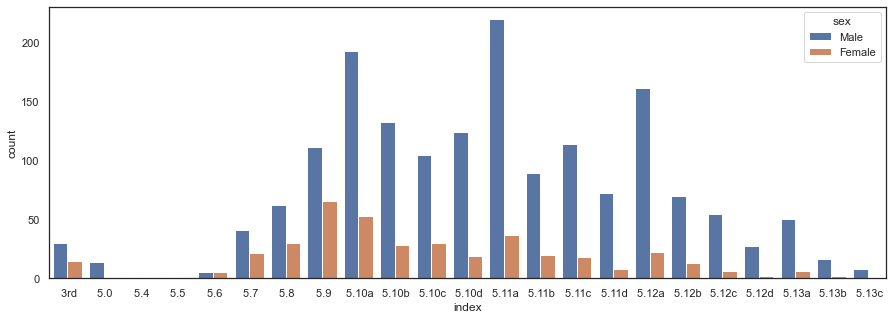

In [572]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="count", hue="sex", data=combined_count_df,
    order = [' 3rd', ' 5.0', ' 5.4', ' 5.5', ' 5.6', ' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.11d', ' 5.12a', ' 5.12b', ' 5.12c',
             ' 5.12d', ' 5.13a', ' 5.13b', ' 5.13c'])
ax.grid(False)

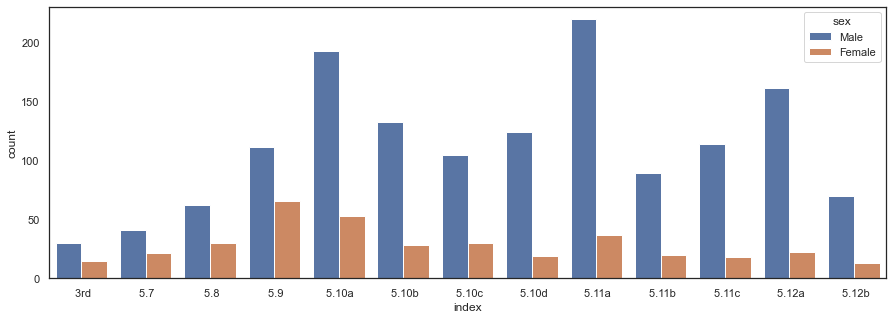

In [573]:
# Cutting off climbs where fewer than 10 women are represented
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
ax = sns.barplot(x="index", y="count", hue="sex", data=combined_count_df,
    order = [' 3rd', ' 5.7', ' 5.8', ' 5.9', ' 5.10a', ' 5.10b',
            ' 5.10c', ' 5.10d', ' 5.11a', ' 5.11b', ' 5.11c', ' 5.12a', ' 5.12b'])
ax.grid(False)